<a href="https://colab.research.google.com/github/abuwildanm/food-recognition/blob/master/Create_Dataset_For_Vertex_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Dataset For Vertex AI

## Download dataset from Google Cloud Storage

In [1]:
# Login to our GCP account
!gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=xgeLIIoRO2nZrlzK5BchW8lO0cFRls&prompt=consent&access_type=offline&code_challenge=Zgk9OGj7SC4wW1FVRezL_jJLxgqPGXO5FMS6awrUOuw&code_challenge_method=S256

Enter verification code: 4/1AY0e-g6URGE-sgY-Od11CAopIT5OdjJwG9LHcudDwiBPu4gxOdFkJY4caMU

You are now logged in as [abuwildanm@gmail.com].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


In [2]:
# Set project using our project ID
!gcloud config set project food-nutrition-312416

Updated property [core/project].


In [3]:
# Check the number of file in bucket
!gsutil ls -lR gs://food-nutrition/dataset | tail -n 1

TOTAL: 969 objects, 8041496 bytes (7.67 MiB)


In [4]:
# Download dataset from our bucket
# !mkdir ./dataset
!gsutil -m cp -r gs://food-nutrition/dataset .

Copying gs://food-nutrition/dataset/predefined-classes.txt...
Copying gs://food-nutrition/dataset/train/omelette/classes.txt...
Copying gs://food-nutrition/dataset/train/omelette/omelette-1.jpg...
Copying gs://food-nutrition/dataset/train/omelette/omelette-1.txt...
Copying gs://food-nutrition/dataset/train/omelette/omelette-10.jpg...
Copying gs://food-nutrition/dataset/train/omelette/omelette-101.jpg...
Copying gs://food-nutrition/dataset/train/omelette/omelette-101.txt...
Copying gs://food-nutrition/dataset/train/omelette/omelette-10.txt...
Copying gs://food-nutrition/dataset/train/omelette/omelette-102.jpg...
Copying gs://food-nutrition/dataset/train/omelette/omelette-102.txt...
Copying gs://food-nutrition/dataset/train/omelette/omelette-103.jpg...
Copying gs://food-nutrition/dataset/train/omelette/omelette-103.txt...
Copying gs://food-nutrition/dataset/train/omelette/omelette-104.jpg...
Copying gs://food-nutrition/dataset/train/omelette/omelette-104.txt...
Copying gs://food-nutritio

## View the dataset

In [5]:
%cd /content/

/content


In [6]:
import os
from glob import glob

with open('/content/dataset/predefined-classes.txt') as f:
    categories = f.read().splitlines()

print('Number of train images:')
for category in categories:
    print('{}: {}'.format(category, len(glob('dataset/train/{}/*.jpg'.format(category)))))

print('='*40)
print('Number of train annotation:')
for category in categories:
    # -1 because doesn't include classes.txt
    print('{}: {}'.format(category, len(glob('dataset/train/{}/*.txt'.format(category)))-1))

print('='*40)
print('Number of validation images:')
for category in categories:
    print('{}: {}'.format(category, len(glob('dataset/validation/{}/*.jpg'.format(category)))))

print('='*40)
print('Number of validation annotation:')
for category in categories:
    # -1 because doesn't include classes.txt
    print('{}: {}'.format(category, len(glob('dataset/validation/{}/*.txt'.format(category)))-1))

Number of train images:
omelette: 100
rice: 100
tempeh: 100
tofu: 100
Number of train annotation:
omelette: 100
rice: 100
tempeh: 100
tofu: 100
Number of validation images:
omelette: 20
rice: 20
tempeh: 20
tofu: 20
Number of validation annotation:
omelette: 20
rice: 20
tempeh: 20
tofu: 20


In [7]:
from cv2 import cv2
import matplotlib.pyplot as plt
import numpy as np

def show_bounding_boxes(image, annotation):
    dh, dw, _ = image.shape
    for label in annotation:
        # Split string to float
        _, x, y, w, h = map(float, label.split(' '))
                
        # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
        # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)
                
        if l < 0: 
            l = 0
        if r > dw - 1: 
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1

        cv2.rectangle(image, (l, t), (r, b), (255, 0, 0), 2)

def show_images(category, data_type='train', size=10, show_bbox=False):
    # Path of all image in category directory
    img_path = glob('dataset/{}/{}/*.jpg'.format(data_type, category))
    # Path to category directory
    annotation_dir = 'dataset/{}/{}'.format(data_type, category)
    # Shuffle the path
    np.random.shuffle(img_path)
    
    # Adjust rows & cols for subplotting
    nrows = 2
    ncols = size / nrows
    # Create figure for plot the image
    fig = plt.figure(figsize=(15, 6))
    # Plot process
    for idx in range(size):
        # Create subplot
        ax = fig.add_subplot(nrows, ncols, idx+1, xticks=[], yticks=[])
        # Read the image
        image = plt.imread(img_path[idx])
        # Open the annotation
        image_name = os.path.basename(img_path[idx]).split('.')[0]
        annotation_path = '{}/{}.txt'.format(annotation_dir, image_name)
        f = open(annotation_path, 'r')
        annotation = f.read().splitlines()
        f.close()

        if show_bbox: show_bounding_boxes(image, annotation)
        
        # Plot the image
        plt.title(os.path.basename(img_path[idx]))
        plt.imshow(image)

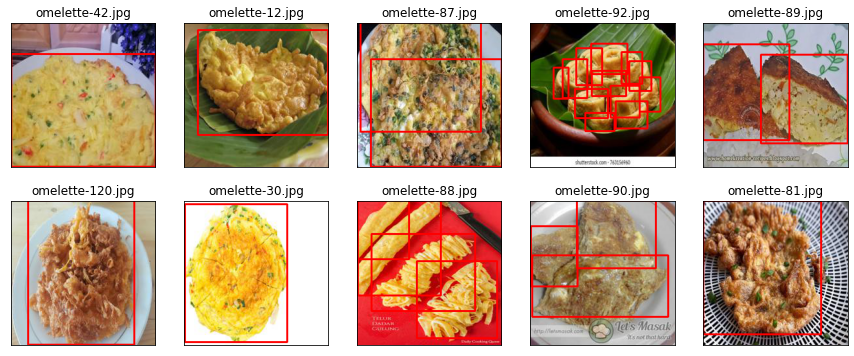

In [8]:
show_images('omelette', show_bbox=True)

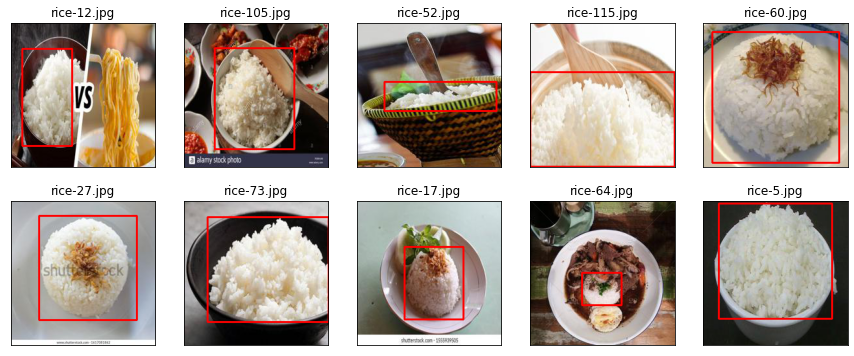

In [9]:
show_images('rice', show_bbox=True)

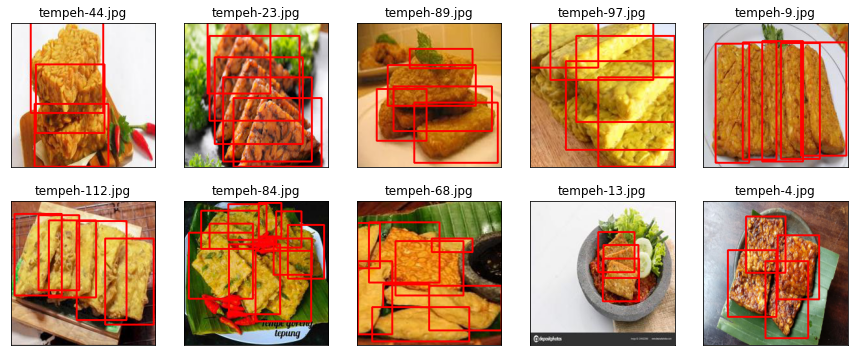

In [10]:
show_images('tempeh', show_bbox=True)

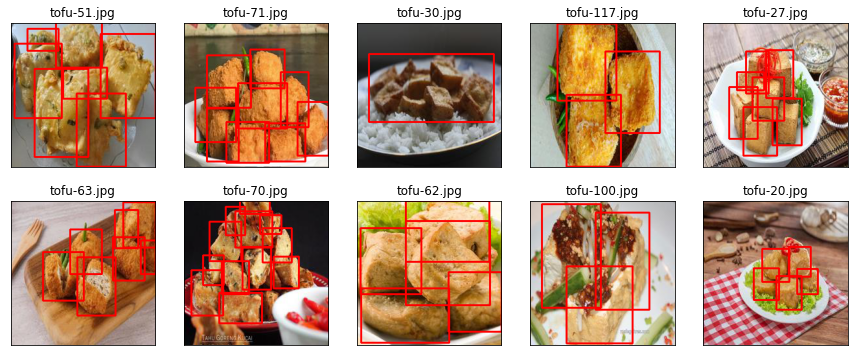

In [11]:
show_images('tofu', show_bbox=True)

## List the images

In [12]:
import subprocess

# Initialize the Google Cloud Storage (GCS) bucket
bucket = 'gs://food-nutrition'
# Define the dataset directory on GCS
dataset_dir = '{}/dataset'.format(bucket)

# Execute gsutil command to list train images
command = 'gsutil ls -r {}/train/*/*.jpg'.format(dataset_dir)
train_img_path = subprocess.getoutput(command).split('\n')
train_img_path = np.array(train_img_path)
# Execute gsutil command to list validation images
command = 'gsutil ls -r {}/validation/*/*.jpg'.format(dataset_dir)
valid_img_path = subprocess.getoutput(command).split('\n')
valid_img_path = np.array(valid_img_path)

In [13]:
train_img_path[:5]

array(['gs://food-nutrition/dataset/train/omelette/omelette-1.jpg',
       'gs://food-nutrition/dataset/train/omelette/omelette-10.jpg',
       'gs://food-nutrition/dataset/train/omelette/omelette-101.jpg',
       'gs://food-nutrition/dataset/train/omelette/omelette-102.jpg',
       'gs://food-nutrition/dataset/train/omelette/omelette-103.jpg'],
      dtype='<U59')

In [14]:
valid_img_path[:5]

array(['gs://food-nutrition/dataset/validation/omelette/omelette-100.jpg',
       'gs://food-nutrition/dataset/validation/omelette/omelette-11.jpg',
       'gs://food-nutrition/dataset/validation/omelette/omelette-116.jpg',
       'gs://food-nutrition/dataset/validation/omelette/omelette-118.jpg',
       'gs://food-nutrition/dataset/validation/omelette/omelette-119.jpg'],
      dtype='<U64')

In [15]:
print('Total training images:', len(train_img_path))
print('Total validation images:', len(valid_img_path))

Total training images: 400
Total validation images: 80


## List the annotation

In [16]:
# Read the classes file
f = open('/content/dataset/predefined-classes.txt')
classes = f.read().splitlines()
classes = np.array(classes)
f.close()

In [17]:
# List all of annotation txt in train
train_annotation_path = glob('/content/dataset/train/*/*.txt')
# Remove all of classes.txt from list
train_annotation_path = list(filter(lambda path: os.path.basename(path) != 'classes.txt', train_annotation_path))
# Convert list to numpy array
train_annotation_path = np.array(train_annotation_path)

# List all of annotation txt in validation
valid_annotation_path = glob('/content/dataset/validation/*/*.txt')
# Remove all of classes.txt from list
valid_annotation_path = list(filter(lambda path: os.path.basename(path) != 'classes.txt', valid_annotation_path))
# Convert list to numpy array
valid_annotation_path = np.array(valid_annotation_path)

In [18]:
train_annotation_path[:5]

array(['/content/dataset/train/tofu/tofu-100.txt',
       '/content/dataset/train/tofu/tofu-99.txt',
       '/content/dataset/train/tofu/tofu-68.txt',
       '/content/dataset/train/tofu/tofu-70.txt',
       '/content/dataset/train/tofu/tofu-120.txt'], dtype='<U48')

In [19]:
valid_annotation_path[:5]

array(['/content/dataset/validation/tofu/tofu-53.txt',
       '/content/dataset/validation/tofu/tofu-21.txt',
       '/content/dataset/validation/tofu/tofu-54.txt',
       '/content/dataset/validation/tofu/tofu-29.txt',
       '/content/dataset/validation/tofu/tofu-9.txt'], dtype='<U53')

## Make the csv file

In [46]:
def create_csv_matrix(images_path, annotation_path, csv_matrix, dataset_type='training'):
    for i, path in enumerate(annotation_path):
        # Read annotation from txt file
        annotation = np.loadtxt(path)

        # Skip the file if empty
        # if annotation.size == 0: continue

        # Reshape numpy array to make sure 2D array
        annotation = annotation.reshape((-1, 5)).astype('object')
        # Convert numerical labels to categorical labels
        labels = classes[annotation[:, 0].astype('int')]
        # Change the numerical labels from annotation
        annotation[:, 0] = labels

        # Get file name from path
        file_name = os.path.basename(path).split('.')[0]
        # Create lambda function for searching image file
        search_file_function = (lambda path: os.path.basename(path) == '{}.jpg'.format(file_name))
        # Get image path using filter function
        img_path = list(filter(search_file_function, images_path))[0]

        # Insert row data for csv
        csv_row = np.insert(annotation, 0, img_path, axis=1)
        csv_row = np.insert(csv_row, 0, dataset_type, axis=1)

        # Insert row data to csv matrix
        csv_matrix = np.vstack((csv_matrix, csv_row))
    
    return csv_matrix

In [47]:
csv_matrix = np.array([]).reshape((0, 7))
csv_matrix = create_csv_matrix(train_img_path, train_annotation_path, csv_matrix, dataset_type='training')
csv_matrix = create_csv_matrix(valid_img_path, valid_annotation_path, csv_matrix, dataset_type='validation')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: loadtxt: Empty input file: "/content/dataset/train/tofu/tofu-86.txt"
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: loadtxt: Empty input file: "/content/dataset/train/tofu/tofu-94.txt"
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: loadtxt: Empty input file: "/content/dataset/train/tofu/tofu-60.txt"
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: loadtxt: Empty input file: "/content/dataset/train/tofu/tofu-10.txt"
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: loadtxt: Empty input file: "/content/dataset/train/rice/rice-97.txt"
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: loadtxt: Empty input file: "/content/dataset/validation/tofu/tofu-9.txt"
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: loadtxt: Empty input file

In [48]:
csv_matrix

array([['training',
        'gs://food-nutrition/dataset/train/tofu/tofu-100.jpg', 'tofu',
        ..., 0.725446, 0.455357, 0.53125],
       ['training',
        'gs://food-nutrition/dataset/train/tofu/tofu-100.jpg', 'tofu',
        ..., 0.421875, 0.370536, 0.674107],
       ['training',
        'gs://food-nutrition/dataset/train/tofu/tofu-100.jpg', 'tofu',
        ..., 0.383929, 0.40625, 0.714286],
       ...,
       ['validation',
        'gs://food-nutrition/dataset/validation/tempeh/tempeh-90.jpg',
        'tempeh', ..., 0.223214, 0.558036, 0.428571],
       ['validation',
        'gs://food-nutrition/dataset/validation/tempeh/tempeh-90.jpg',
        'tempeh', ..., 0.716518, 0.508929, 0.566964],
       ['validation',
        'gs://food-nutrition/dataset/validation/tempeh/tempeh-90.jpg',
        'tempeh', ..., 0.287946, 0.879464, 0.352679]], dtype=object)

In [49]:
import pandas as pd

# Convert csv matrix to dataframe
df = pd.DataFrame(csv_matrix)
# Save csv matrix to csv file
df.to_csv('food-data.csv', header=False, index=False)